In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

### Example 1: Pressure driven flow in a slit (1D)
        

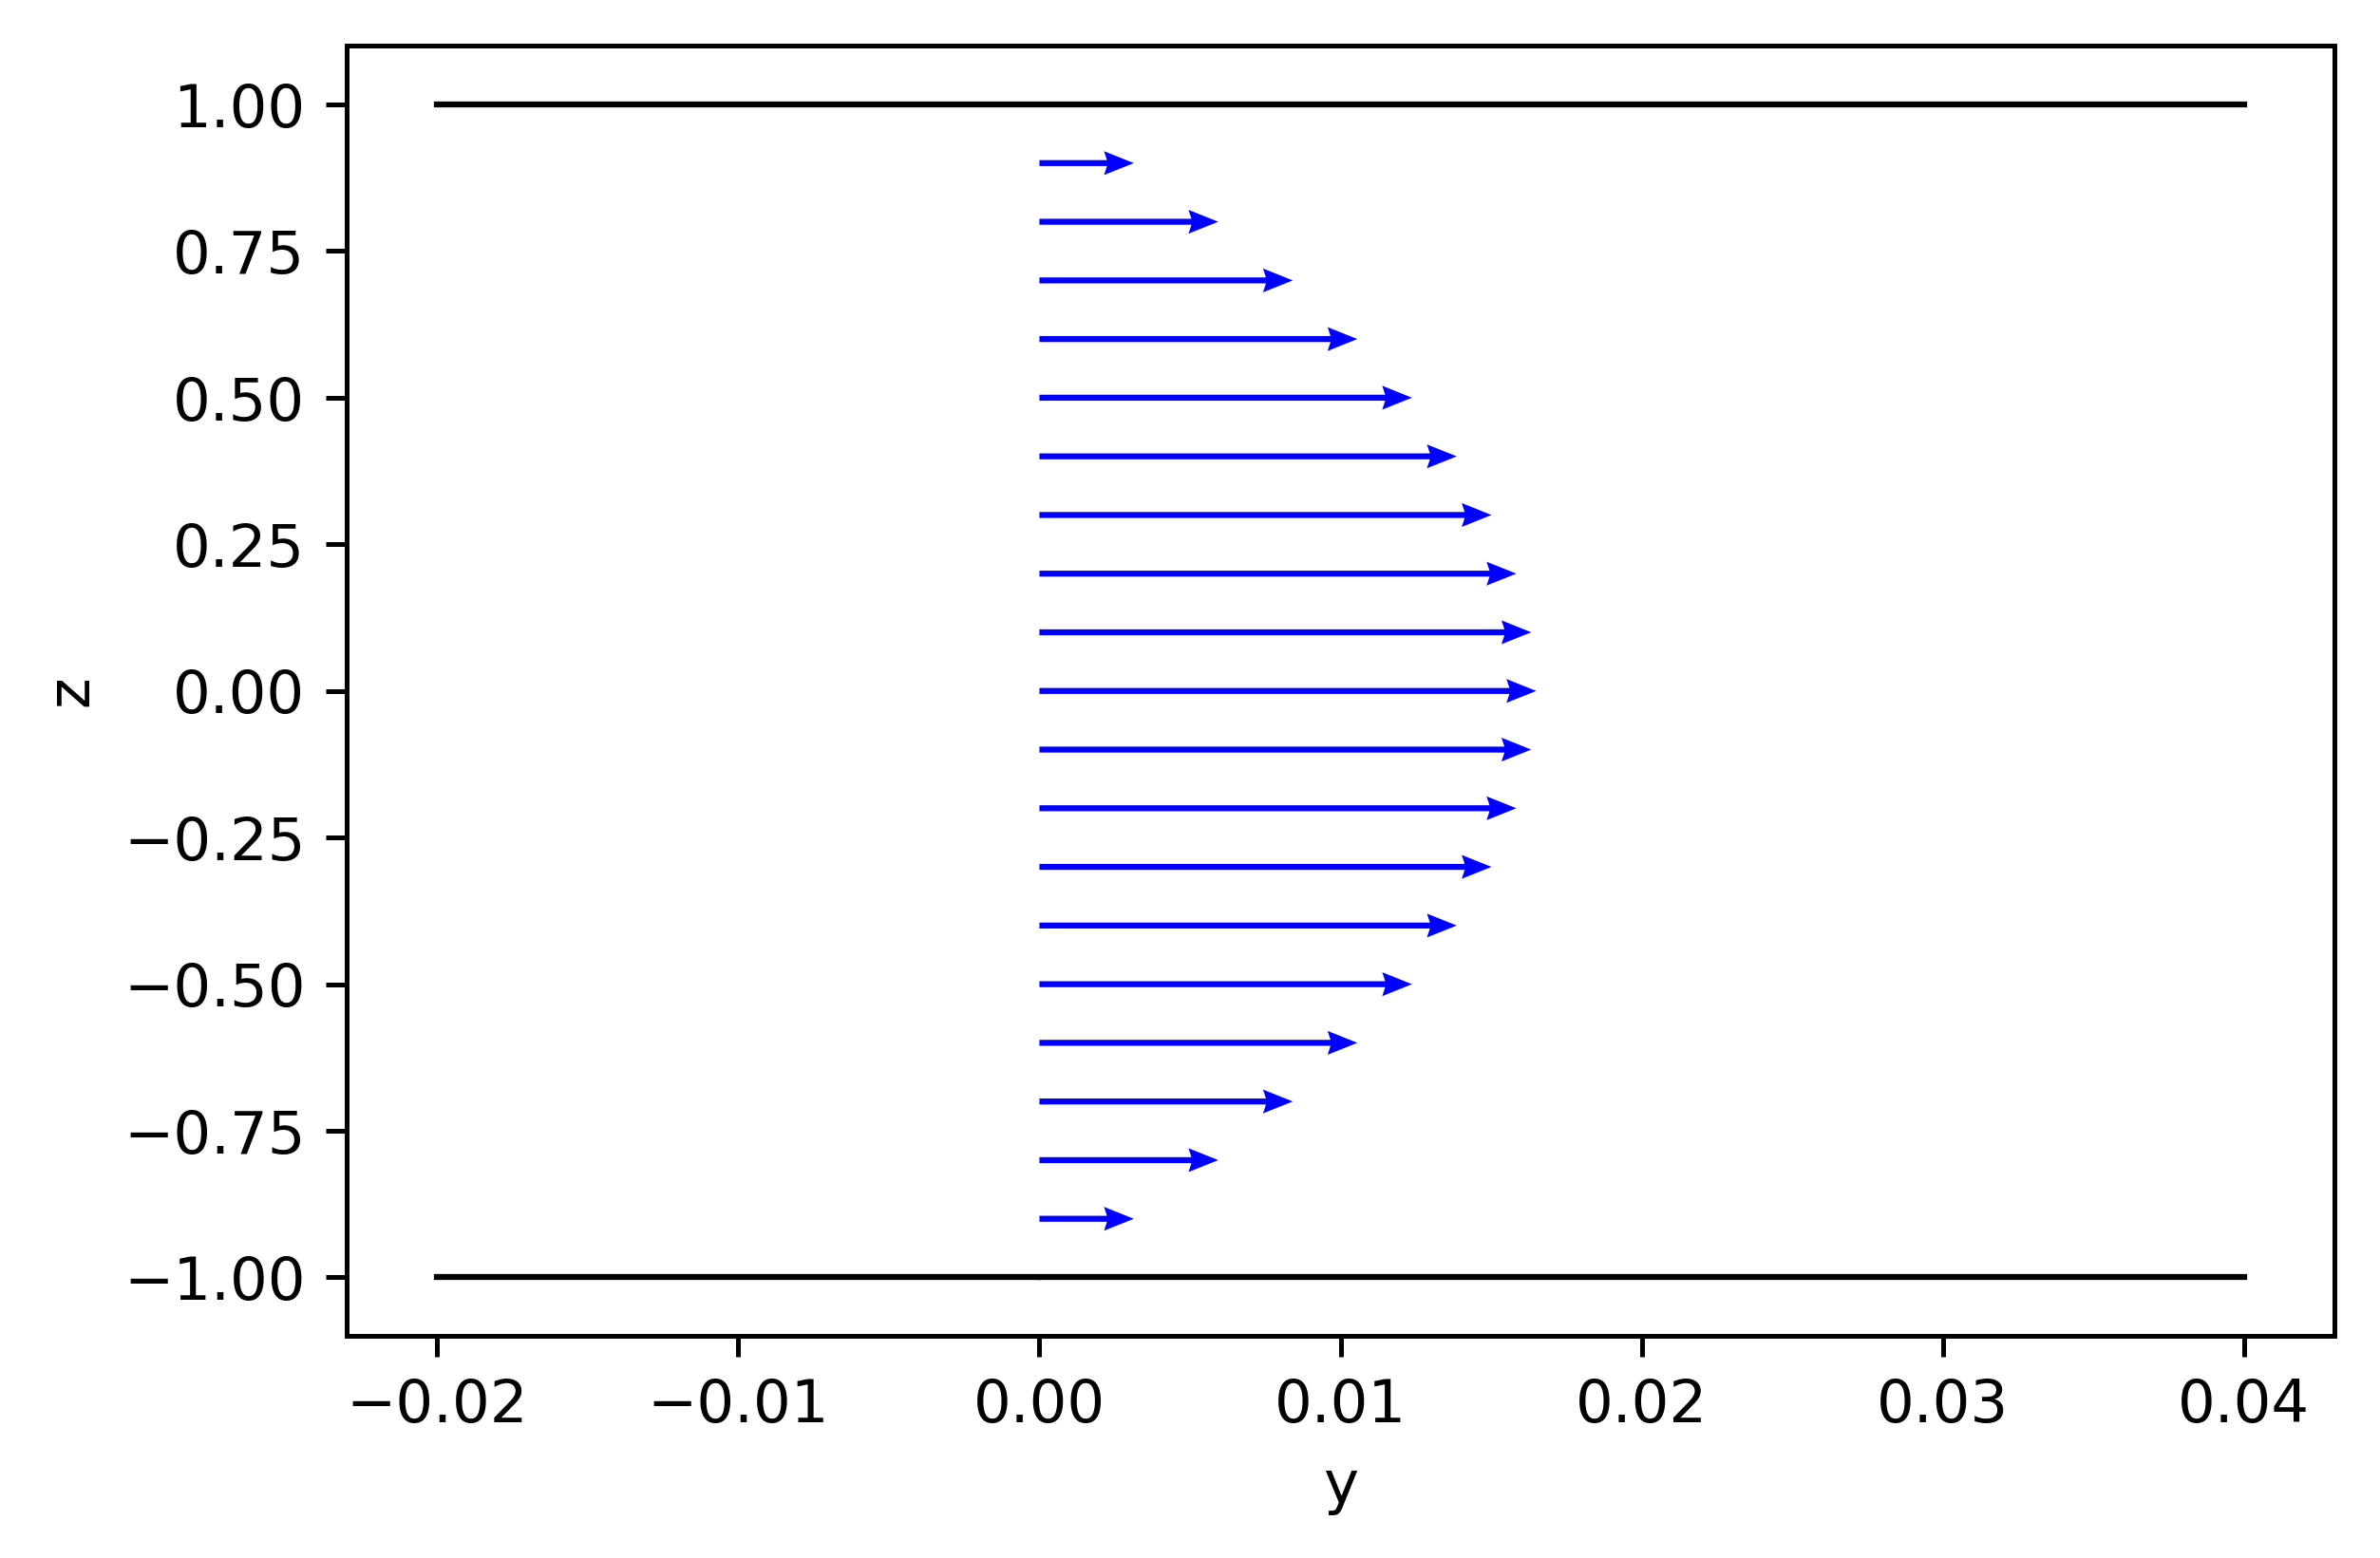

In [16]:
H=1
DeltaP=1
mu=1
L=1

Npts = 21
y = np.zeros(Npts)
z = np.linspace(-H, H, Npts)

# u = vx, v = vy, w = vz
v = H**2*DeltaP/(2*mu*L)*(1-(z/H)**2)
w = np.zeros(Npts)

plt.figure(dpi=450)
plt.plot([-0.02, 0.04], [-H, -H], '-k', linewidth=1)
plt.plot([-0.02, 0.04], [H, H], '-k', linewidth=1)
plt.quiver(y, z, v, w, scale=2, width=0.003, color='blue', headwidth=4)
plt.xlabel('y')
plt.ylabel('z')
plt.savefig('Lec14_Supp-1D_laminar_flow.pdf')

### Example 2: Axisymmetric laminar flow around a sphere
Note: 2D projection at x=0

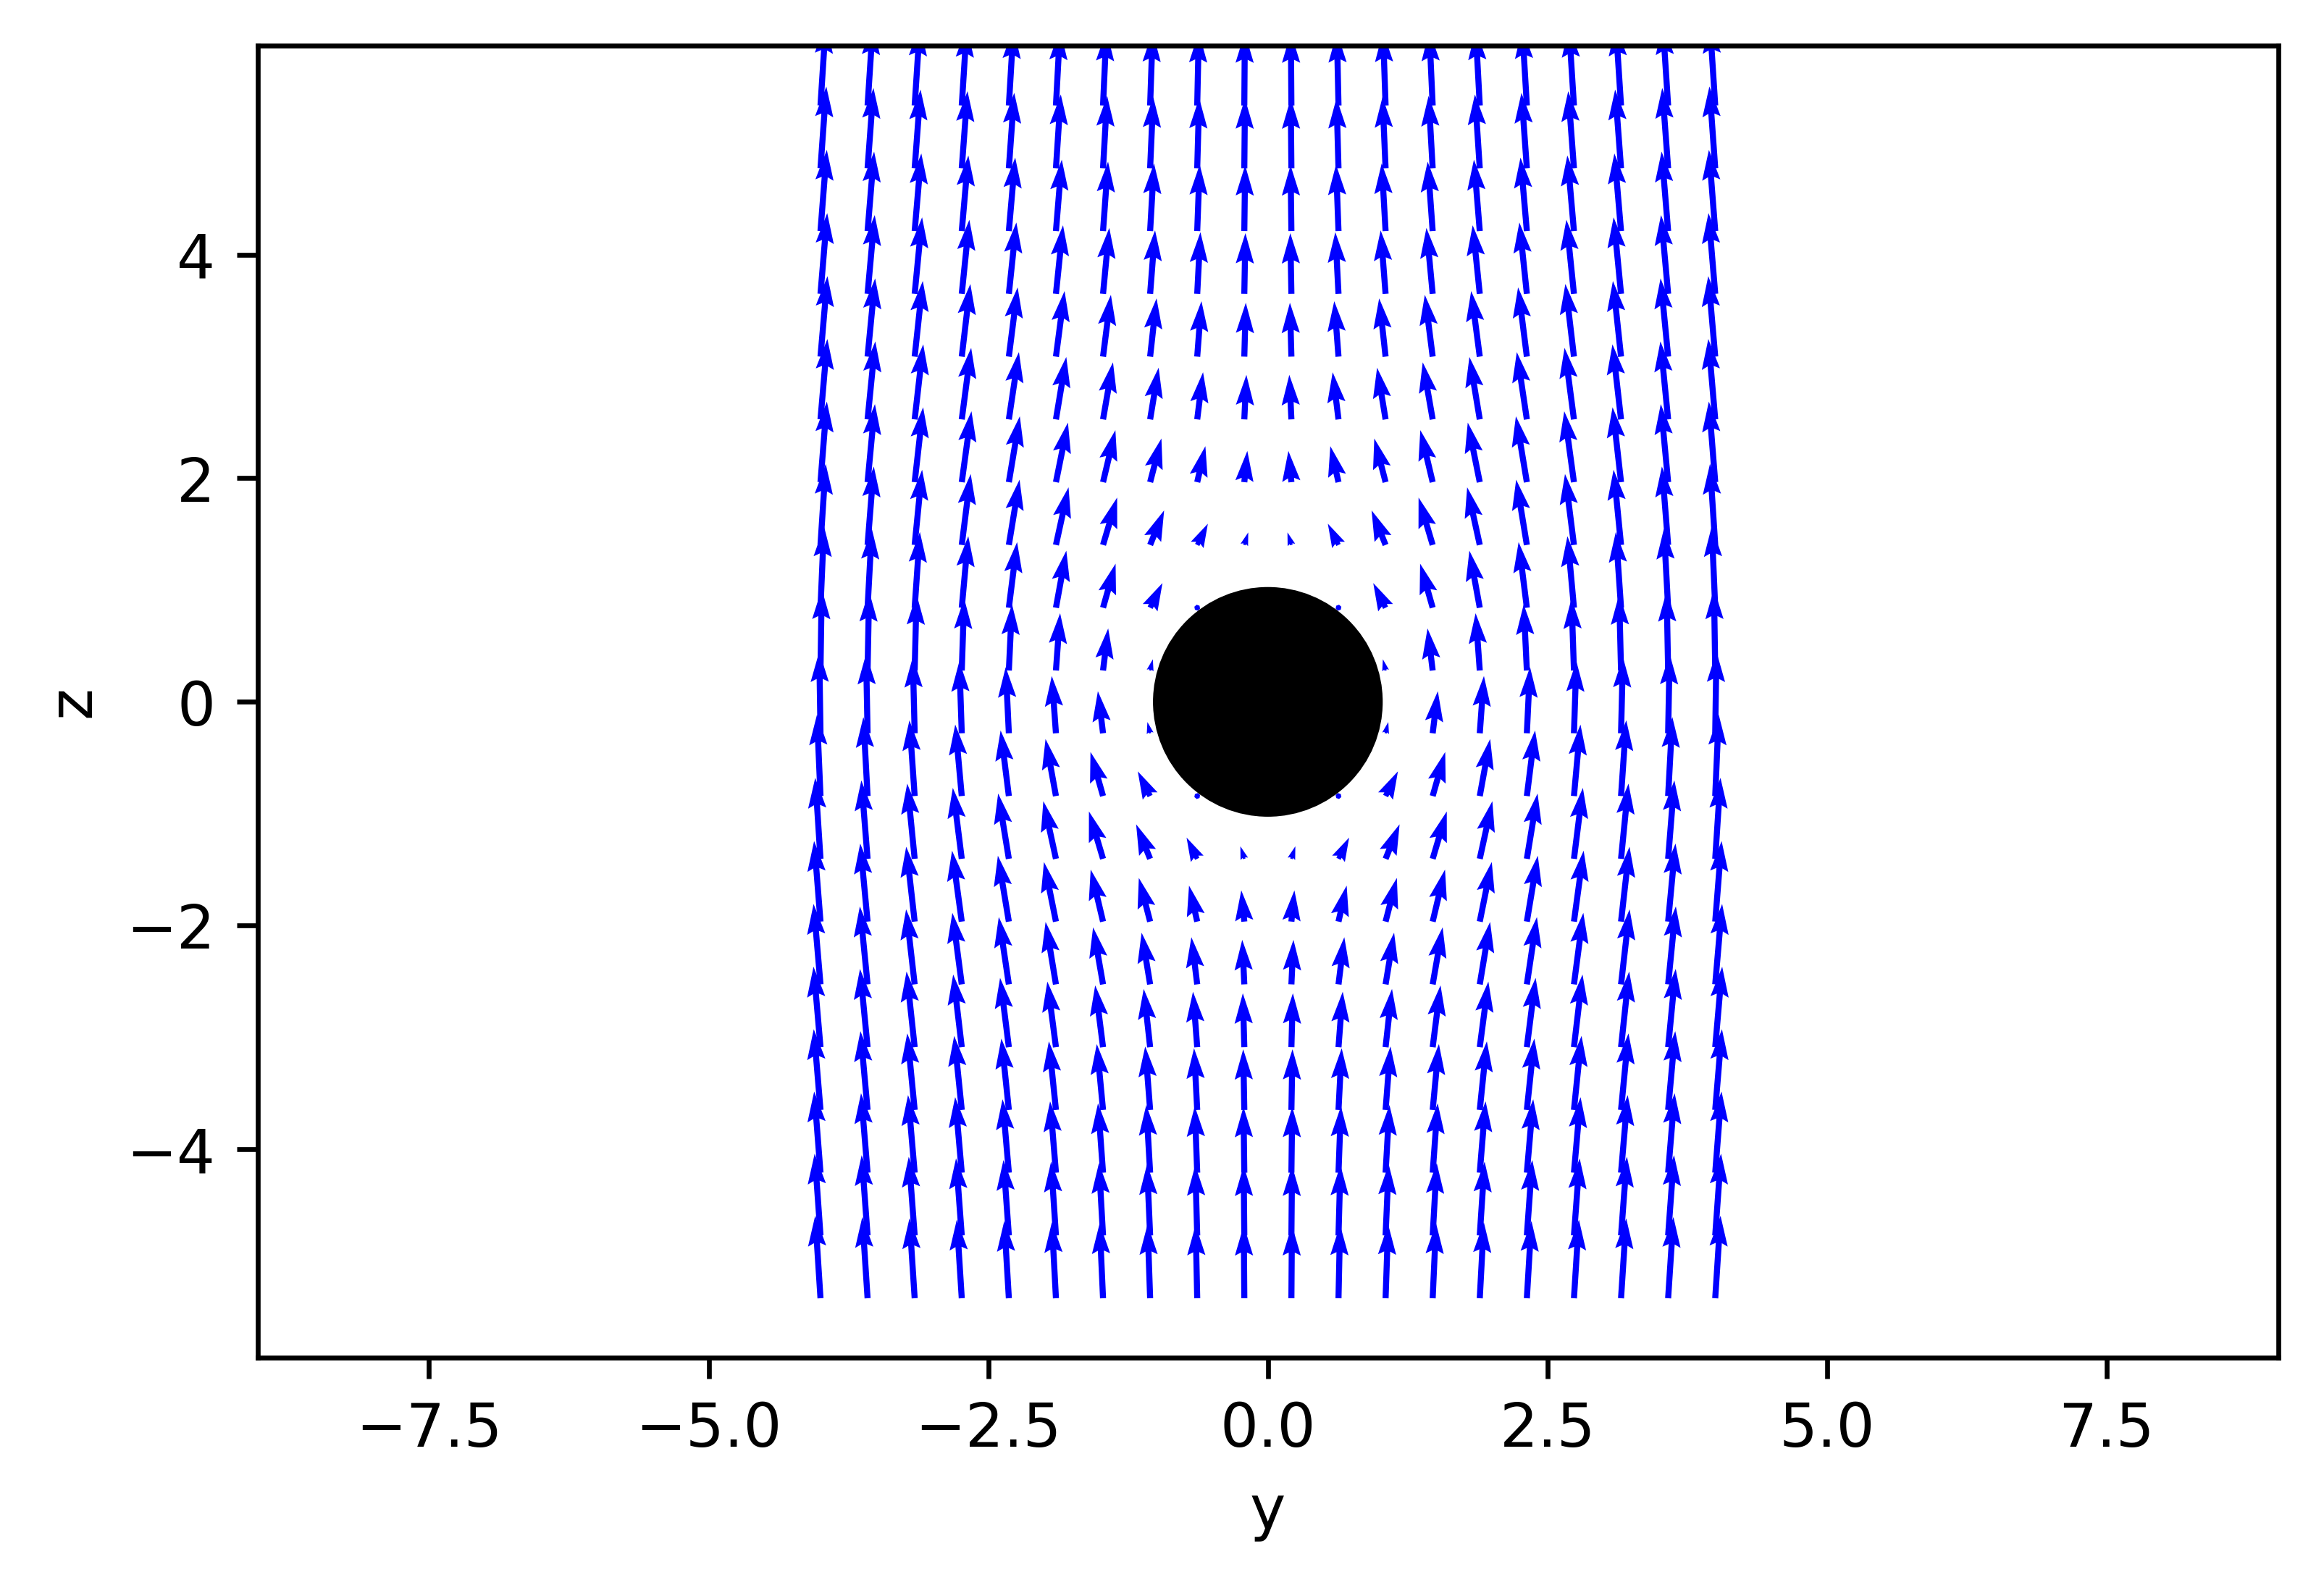

<Figure size 432x288 with 0 Axes>

In [24]:
U=1
R=1

# Make the grid
#phi = np.zeros((Npts, Npts))+np.pi/2
#r, theta = np.meshgrid(np.linspace(R, 2*R, Npts),
#                       np.linspace(0, 2*np.pi, Npts))
#x=r*np.sin(theta)*np.cos(phi)
#y=r*np.sin(theta)*np.sin(phi)
#z=r*np.cos(theta)

Npts = 20 #16
x = np.zeros((Npts, Npts))+1e-16
y, z = np.meshgrid(np.linspace(-4*R, 4*R, Npts),
                   np.linspace(-16/3*R, 16/3*R, Npts))

r = np.sqrt(x**2 + y**2 + z**2)
for i in range(Npts):
    for j in range(Npts):
        if (r[i,j] <= R):
            r[i,j]=np.nan

theta = np.arccos(z/r)
phi = np.arctan(y/x) #np.zeros((Npts, Npts)) #+ np.pi #

vr = U*(1-3./2*(R/r)+1./2.*(R/r)**3)*np.cos(theta)
vtheta = -U*(1-3./4*(R/r)-1./4.*(R/r)**3)*np.sin(theta)

u = vr*np.sin(theta)*np.cos(phi) + vtheta*np.cos(theta)*np.cos(phi)
v = vr*np.sin(theta)*np.sin(phi) + vtheta*np.cos(theta)*np.sin(phi)
w = vr*np.cos(theta) - vtheta*np.sin(theta)

fig = plt.figure(dpi=600)
plt.axis('equal')
plt.quiver(y, z, v, w, scale=20, width=0.003, color='blue', headwidth=3)
circle=plt.Circle((0,0),1, color='black')
fig.gca().add_artist(circle)
plt.xlabel('y')
plt.ylabel('z')
plt.show()
plt.savefig('Lec14_Supp-Axisymmetric_Laminar_Flow_Sphere.pdf')